In [1]:
from team_functions import dataPrep, getTeamRollingSeason

In [2]:
import pandas as pd
import os

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [6]:
def mapTeamId(team_id):
    teams = ['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 
             'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA','MIL', 'MIN', 'NOP', 'NYK', 
             'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']
    return teams.index(team_id) + 1

In [7]:
teams_df = pd.DataFrame([])
current_df = pd.DataFrame([])
for team_file in os.listdir('data/TeamsPrep'):
    team_id = team_file[:3]
    
    season = 4
    for year in [2020, 2021, 2022, 2023]:
        team_df = pd.read_excel(f'data/TeamsPrep/{team_file}', str(year))

        team_df['TeamID'] = mapTeamId(team_id)
        team_df['OppID'] = team_df['OppID'].apply(lambda x: mapTeamId(x))
        team_df['Season'] = season

        teams_df = pd.concat([teams_df, team_df])
        season -= 1
        
    team_df = pd.read_excel(f'data/CurrentSeason/{team_file}')
    
    roll_df = getTeamRollingSeason(team_df)
    prep_df = dataPrep(roll_df, 'Games')
    
    prep_df['TeamID'] = mapTeamId(team_id)
    prep_df['OppID'] = prep_df['OppID'].apply(lambda x: mapTeamId(x))
    prep_df['Season'] = 0
    
    current_df = pd.concat([current_df, prep_df])
    
teams_df = teams_df.reset_index(drop=True)
current_df = current_df.reset_index(drop=True)

In [8]:
teams_df

,Game,Date,Streak,Pts,Pace,eFG,TOV,ORB,FTR,ORT,...,OppORB,OppFTR,OppORT,Location,Target,Month,DayOfWeek,DaysOfRest,TeamID,Season
0,2,2019-10-25,-1,102.000000,95.300000,0.512000,12.900000,20.900000,0.176000,107.000000,...,21.200000,0.156000,101.200000,1,1,10,4,3,14,4
1,3,2019-10-27,1,98.500000,96.000000,0.477000,12.800000,21.900000,0.198500,102.650000,...,21.250000,0.151500,109.650000,1,1,10,6,2,14,4
2,4,2019-10-29,2,105.666667,97.166667,0.513333,12.400000,22.533333,0.171667,108.633333,...,21.266667,0.189333,100.600000,1,1,10,1,2,14,4
3,5,2019-11-01,3,109.250000,100.100000,0.511500,13.025000,22.725000,0.224750,109.025000,...,20.375000,0.266500,113.775000,0,1,11,4,3,14,4
4,6,2019-11-03,4,111.200000,99.980000,0.516400,12.320000,20.620000,0.213200,108.900000,...,25.960000,0.253200,112.620000,0,1,11,6,2,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9111,78,2023-03-31,-7,110.402597,98.222078,0.516260,13.525974,30.009091,0.217273,111.931169,...,24.680263,0.228750,111.493421,1,1,3,4,2,11,1
9112,79,2023-04-02,1,110.538462,98.207692,0.516359,13.487179,30.061538,0.219744,112.094872,...,22.596104,0.237247,114.746753,1,0,4,6,2,11,1
9113,80,2023-04-04,-1,110.518987,98.186076,0.516089,13.405063,30.043038,0.217949,112.105063,...,24.353846,0.196256,118.703846,1,1,4,1,2,11,1
9114,81,2023-04-07,1,110.687500,98.231250,0.516137,13.367500,30.130000,0.217425,112.226250,...,23.565000,0.194100,109.976250,0,1,4,4,3,11,1


In [9]:
current_df

,Game,Date,Streak,Pts,Pace,eFG,TOV,ORB,FTR,ORT,...,OppORB,OppFTR,OppORT,Location,Target,Month,DayOfWeek,DaysOfRest,TeamID,Season
0,2,2023-10-26,-1.0,107.000000,95.300000,0.511000,10.000000,28.300000,0.167000,112.300000,...,22.7,0.222,94.2,1,1,10,3,2.0,14,0
1,3,2023-10-29,1.0,103.500000,98.050000,0.484500,12.100000,22.650000,0.220500,105.750000,...,11.8,0.163,114.5,0,0,10,6,3.0,14,0
2,4,2023-10-30,-1.0,111.333333,100.200000,0.494667,11.266667,20.533333,0.235333,107.200000,...,24.5,0.137,104.5,1,1,10,0,1.0,14,0
3,5,2023-11-01,1.0,110.000000,99.775000,0.516500,12.325000,17.550000,0.220750,107.300000,...,22.2,0.172,114.2,1,1,11,2,2.0,14,0
4,6,2023-11-04,2.0,114.000000,99.660000,0.527600,12.200000,18.220000,0.236600,109.580000,...,38.8,0.158,121.1,0,0,11,5,3.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,39,2024-01-15,-1.0,112.657895,97.734211,0.531579,11.076316,23.200000,0.211211,114.455263,...,21.1,0.349,127.0,0,0,1,0,2.0,11,0
1288,40,2024-01-17,-2.0,112.717949,97.733333,0.531923,11.082051,23.443590,0.211333,114.538462,...,27.3,0.207,115.7,0,0,1,2,2.0,11,0
1289,41,2024-01-20,-3.0,112.250000,97.645000,0.530225,11.050000,23.190000,0.210800,114.170000,...,32.7,0.162,115.2,1,1,1,5,3.0,11,0
1290,42,2024-01-21,1.0,112.609756,97.678049,0.529073,10.907317,23.473171,0.208585,114.217073,...,29.6,0.133,111.0,1,0,1,6,1.0,11,0


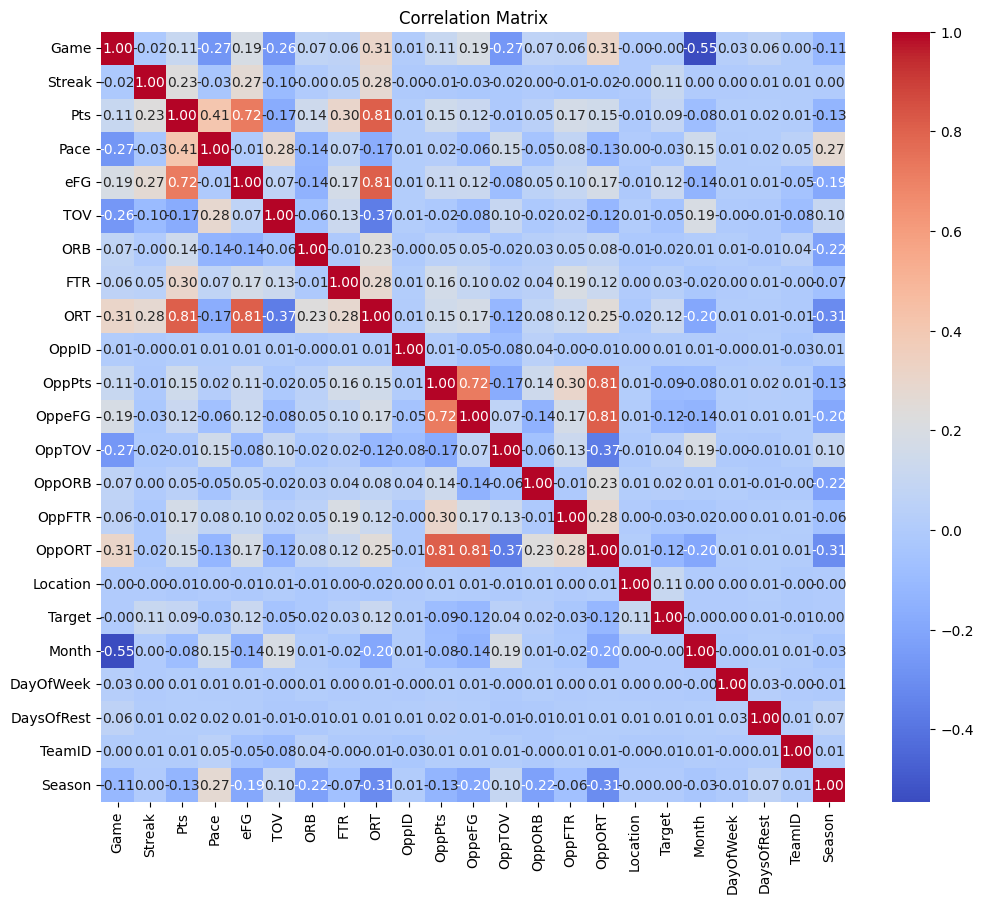

In [10]:
correlation_matrix = teams_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [12]:
X = pd.concat([teams_df, current_df])
y = X['Target']
X = X.drop(columns=['Target', 'Date'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

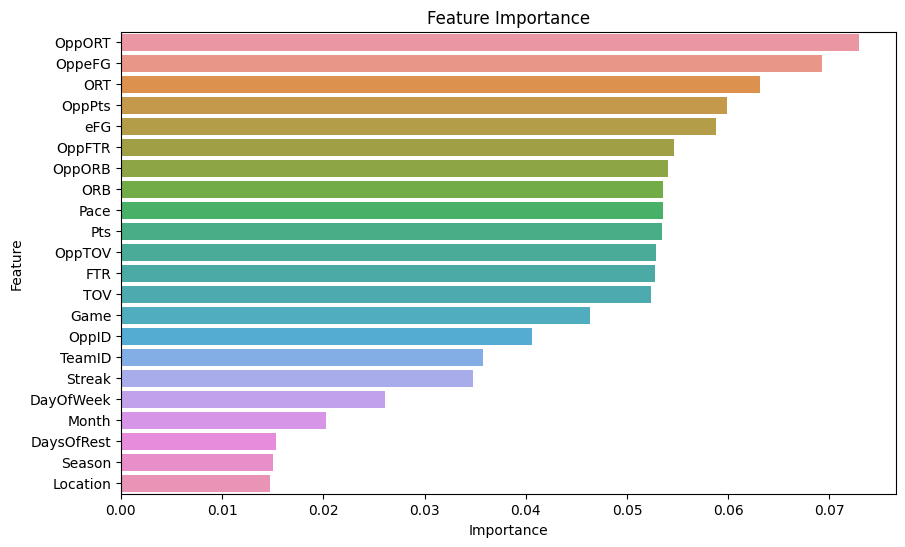

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [17]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

In [19]:
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
logreg_l1.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [20]:
coefficients_l1 = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg_l1.coef_[0]})
coefficients_l1 = coefficients.sort_values(by='Coefficient', ascending=False)

In [22]:
logreg_l2 = LogisticRegression(penalty='l2', solver='liblinear')
logreg_l2.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [23]:
coefficients_l2 = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg_l2.coef_[0]})
coefficients_l2 = coefficients.sort_values(by='Coefficient', ascending=False)

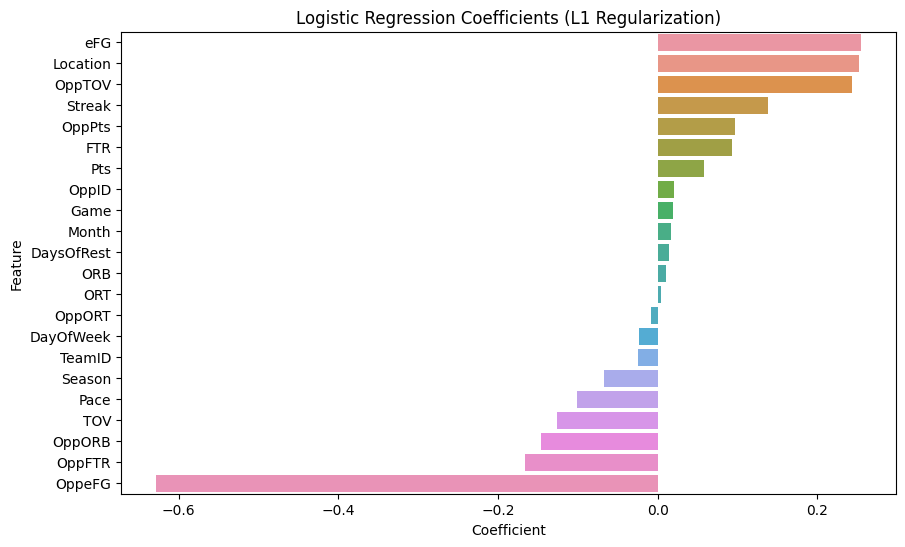

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Logistic Regression Coefficients (L1 Regularization)')
plt.show()

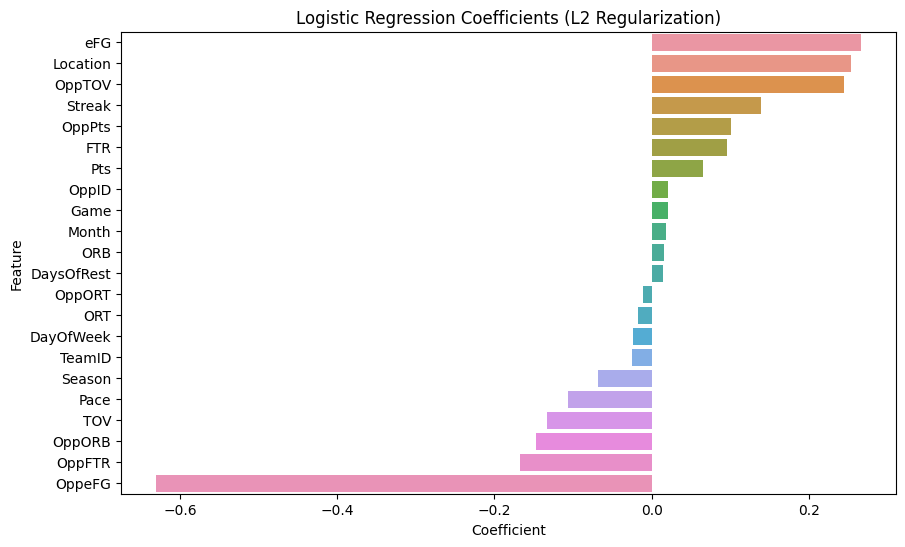

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Logistic Regression Coefficients (L2 Regularization)')
plt.show()